<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

# Описание данных

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов») <br>
**Признаки**<br>
RowNumber — индекс строки в данных<br>
CustomerId — уникальный идентификатор клиента<br>
Surname — фамилия<br>
CreditScore — кредитный рейтинг<br>
Geography — страна проживания<br>
Gender — пол<br>
Age — возраст<br>
Tenure — сколько лет человек является клиентом банка<br>
Balance — баланс на счёте<br>
NumOfProducts — количество продуктов банка, используемых клиентом<br>
HasCrCard — наличие кредитной карты<br>
IsActiveMember — активность клиента<br>
EstimatedSalary — предполагаемая зарплата<br><br>
Целевой признак<br>
Exited — факт ухода клиента<br>

## Подготовка данных

импортируем необходимые в проекте библиотеки

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import numpy as np

загрузим данные и посмотрим их содержимое

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Типы данных и значения соответствуют друг другу. Однако Tenure следует перевести в целочисленный формат,а также имеет пропуски. Для более корректной работы моделей предсказания заменим пропуски медианным значением = 5

In [ ]:
df['Tenure'] = df['Tenure'].fillna(5)

In [ ]:
df['Tenure'] = df['Tenure'].astype('int')

проверим данные

In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.99790,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.76001,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.00000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.00000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.00000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.00000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.00000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


построим гистограммы датафрейма

array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>,
        <AxesSubplot:title={'center':'Exited'}>, <AxesSubplot:>]],
      dtype=object)

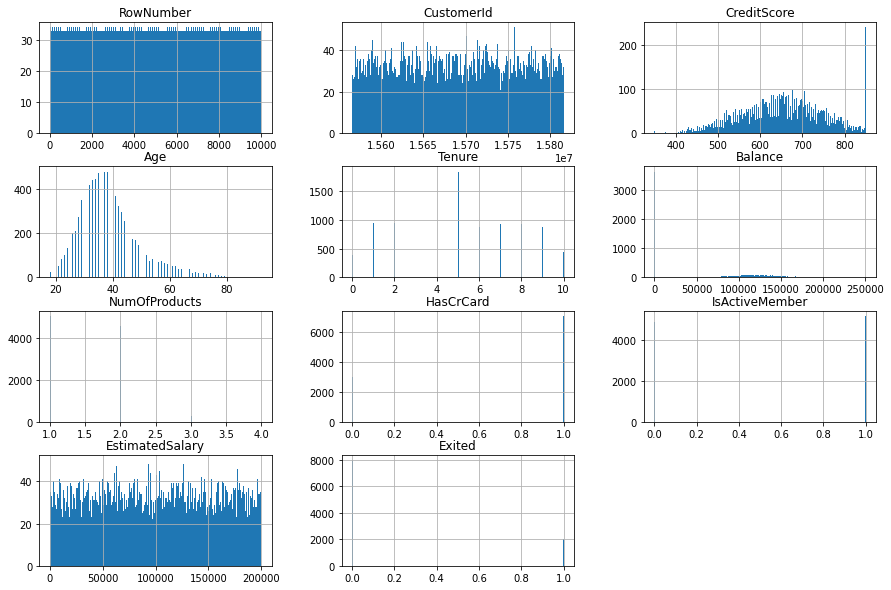

In [ ]:
df.hist(figsize=(15,10),bins=300)

подозрительно выглядит всплеск CreditScore на значении 850.<br>
проверим эти записи

In [ ]:
df[df['CreditScore'] == 850]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
38,39,15717426,Armstrong,850,France,Male,36,7,0.00,1,1,1,40812.90,0
180,181,15716334,Rozier,850,Spain,Female,45,5,122311.21,1,1,1,19482.50,0
200,201,15604482,Chiemezie,850,Spain,Male,30,2,141040.01,1,1,1,5978.20,0
223,224,15733247,Stevenson,850,France,Male,33,10,0.00,1,1,0,4861.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,9582,15709256,Glover,850,France,Female,28,9,0.00,2,1,1,164864.67,0
9646,9647,15603111,Muir,850,Spain,Male,71,10,69608.14,1,1,0,97893.40,1
9688,9689,15730579,Ward,850,France,Male,68,5,169445.40,1,1,1,186335.07,0
9931,9932,15647800,Greco,850,France,Female,34,5,101266.51,1,1,0,33501.98,0


закономерности не видно, строки имеют различное содержание<br>
подсчитаем процент от общего объема

In [ ]:
df['CreditScore'].value_counts()

850    233
678     63
655     54
667     53
705     53
      ... 
412      1
351      1
365      1
373      1
423      1
Name: CreditScore, Length: 460, dtype: int64

In [ ]:
print(233 / 10000 * 100, '%')

2.33 %


Доля от общих данных не значительна, поэтому удалим эти значения для более корректной работы моделей

In [ ]:
df = df.query('CreditScore != 850')

<AxesSubplot:>

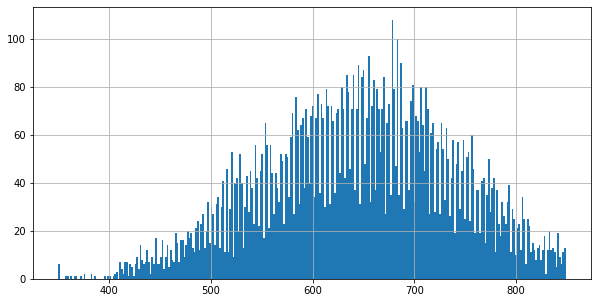

In [ ]:
df['CreditScore'].hist(figsize=(10,5),bins=300)

В ходе обработки данных было отсеяно 2.3% данных по причине аномального всплеска значений CreditScore = 850

## Исследование задачи

**2.1 Преобразование датафрейма для ML**

В датафрейме присутствуют личные данные которые не влияют на решение об уходе. Подготовим новый датафрейм без них

In [ ]:
df_ohe = df.drop(['Surname','RowNumber','CustomerId'] ,axis=1)

In [ ]:
df_ohe.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


в признаках присутствуют нечисловые данные. Преобразуем их методом прямодго кодирования

In [ ]:
df_ohe = pd.get_dummies(df_ohe, drop_first=True)

In [ ]:
df_ohe.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
5,645,44,8,113755.78,2,1,0,149756.71,1,0,1,1


посмотрим соотношение целевого признака

<AxesSubplot:ylabel='Exited'>

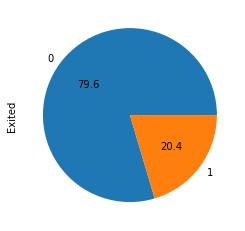

In [ ]:
df['Exited'].value_counts().plot(kind='pie',autopct ='%.1f')

ушедших клиентов в 4 раза меньше действующих

**2.2 Подготовка выборок**

Отделим обучающую выборку сохранив соотношение результатов по Exited

In [ ]:
df_train, df_valid = train_test_split(df_ohe, test_size=0.40, random_state=12345, stratify=df['Exited'])

разделим на валидационную и тестовую соотношение результатов по Exited

In [ ]:
df_valid, df_test = train_test_split(df_valid, test_size=0.50, random_state=12345, stratify=df_valid['Exited'])

Создадим переменные с признаками и целевыми признаками для выборок
<br>Обучающей:

In [ ]:
features_train = df_train.drop(['Exited'], axis=1) # признаки
target_train = df_train['Exited'] # целевой признак

Валидационной:

In [ ]:
features_valid = df_valid.drop(['Exited'], axis=1) # признаки
target_valid = df_valid['Exited'] # целевой признак

Тестовой:

In [ ]:
features_test = df_test.drop(['Exited'], axis=1) # признаки
target_test = df_test['Exited'] # целевой признак

проверим кол-во значений в выборках

In [ ]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(5860, 11)
(5860,)
(1953, 11)
(1953,)
(1954, 11)
(1954,)


**2.3 Обучение и проверка моделей со стандартными гиперпараметрами и без балансировки данных**

создадим фун-ю для обучения модели и подсчета характеристик  auc_roc, f1_score. В качестве информативных данных также рассмотрим accuracy

In [ ]:
def model_result(model, features_train_def = 1, target_train_def = 1, features_valid_def = 1, target_valid_def = 1 ):

    # глобальные переменные
    global target_train, target_valid, features_train,features_valid

    # определение выборок для обучения
    if type(features_train_def) is int:
        features_train_def = features_train
        target_train_def = target_train

    if type(features_valid_def) is int:
        features_valid_def = features_valid
        target_valid_def = target_valid

    # обучаем модель
    model.fit(features_train_def, target_train_def)
    model_result = model.predict(features_valid_def)
    accuracy = accuracy_score(target_valid_def, model_result)
    print('accuracy = ', accuracy)

    # считаем кривую ошибок
    probabilities_valid = model.predict_proba(features_valid_def)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc = roc_auc_score(target_valid_def, probabilities_one_valid)
    print('auc_roc  = ', auc_roc)

    # считаем f1
    f1 = f1_score(target_valid_def, model_result)
    print('f1 score = ', f1)

    return accuracy, auc_roc, f1

обучим модель дерево решений и проверим точность

In [ ]:
model_dtc = DecisionTreeClassifier(random_state=12345 )
model_dtc_accuracy, model_dtc_auc_roc, model_dtc_f1 = model_result(model_dtc)

accuracy =  0.7951868919610855
auc_roc  =  0.6924744293165346
f1 score =  0.5085995085995086


обучим модель случайный лес и проверим точность

In [ ]:
model_rfc = RandomForestClassifier(random_state=12345 )
model_rfc_accuracy, model_rfc_auc_roc, model_rfc_f1 = model_result(model_rfc)

accuracy =  0.8627752176139273
auc_roc  =  0.8591636749531485
f1 score =  0.5825545171339565


обучим модель логистическая регрессия и проверим точность

In [ ]:
model_lr = LogisticRegression(random_state=12345 )
model_lr_accuracy, model_lr_auc_roc, model_lr_f1 = model_result(model_lr)

accuracy =  0.7880184331797235
auc_roc  =  0.6707341068243324
f1 score =  0.07589285714285714


в ходе обучения моделей на стандартных параметрах с дисбалансом получили следующие результаты:<br>
- модель случайный лес показала наилучший accuracy =  0.86 и почти целевой f1 = 0.58<br>
- модели дерево решений и лог. регрессия имеют auc_roc ниже чем лес решений ~17% <br>
- модель лог. регрессия имеет низкое значение f1 score<br>

**Значения точности моделей не соответствуют целевым показателям проекта. Все модели нуждаются в подборке гиперпарамеров и необходима балансировка данных**

## Борьба с дисбалансом

**3.1 Увеличим выборку по значению Exited и проверим значения моделей**

создадим ф-ю upsample для увеличения требуемых

In [ ]:
def upsample(features, target, repeat):
    # разделение выборок на положительные и отрицательные
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    # объеденение выборок и индексация правильных ответов
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    # перемежение выборок
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)

    return features_upsampled, target_upsampled

применем ф-ю к тренировочному набору

In [ ]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

проверим полученные данные

In [ ]:
features_upsampled.shape

(9448, 11)

In [ ]:
target_upsampled.shape

(9448,)

<AxesSubplot:ylabel='Exited'>

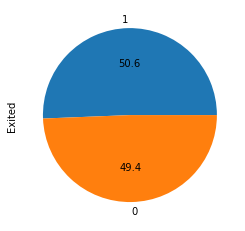

In [ ]:
target_upsampled.value_counts().plot(kind='pie',autopct ='%.1f')

**3.2 Выбор модели**

создадим ф-ю для перебора гиперпараметров "деревянных". основной критерий для оценки моделей F1-мера

In [ ]:
#фун-я перебора max_leaf_nodes и выбора лучшей модели
def max_leafs (model, best_model, features_tr, features_val, i, n, m, \
               best_result,class_weight, splitter, max_depth, max_leaf_nodes):
    global target_upsampled, target_valid
    for z in range(2,20):
        model.set_params(max_leaf_nodes = z)

    # обучаем модель на промежуточных значениях и считаем F1-меру
        model.fit(features_tr, target_upsampled)
        model_result = model.predict(features_val)
        result_f1_score = f1_score(target_valid, model_result)

        if result_f1_score > best_result:
            best_result = result_f1_score  # сохраним наилучшее значение метрики f1 на валидационных данных
            class_weight = i               # сохраним наилучший гиперпараметр class_weight
            splitter = n                   # сохраним наилучший гиперпараметр splitter
            max_depth = m                  # сохраним наилучший гиперпараметр max_depth_dtc
            max_leaf_nodes = z             # сохраним наилучший гиперпараметр max_leaf_nodes

    return best_result, class_weight, splitter, max_depth, max_leaf_nodes



In [ ]:
#фун-я перебора г.п. "деревянных" моделей
def tree_model(features_tr, features_val, type_model):
    #переменные для записи г.п.
    max_leaf_nodes = 0
    max_depth = 0
    splitter = None
    class_weight = None
    best_model = None
    best_result = 0

    # создадим словари для перебора гиперпараметров классовых значений
    cw = {'class_weight':['balanced',None]}
    split = {'splitter':['random','best']}
    true_false = {'key':[True, False]}

    # создадим модель дерево решений
    if type_model == 'dtc':
        model = DecisionTreeClassifier(random_state=12345 )

     # перебор гиперпараметров с использованием вложенных циклов
        for n in split.get('splitter'):
            model.set_params(splitter=n)

            for i in cw.get('class_weight'):
                model.set_params(class_weight=i)

                for m in range(1,11):

                    model.set_params(max_depth = m)

                    best_result, class_weight, splitter, max_depth, max_leaf_nodes = \
                    max_leafs(model, best_model, features_tr, features_val, i, n, m, \
                              best_result, class_weight, splitter, max_depth, max_leaf_nodes)
        print()
        print(f"гиперпараметры модели дерево решений : \
        \nmax_depth: {max_depth}\
        \nclass_weight: {class_weight} \
        \nsplitter: {splitter} \
        \nmax_leaf_nodes: {max_leaf_nodes}")
        print()
        #присвоем модели лучшие гиперпараметры
        model.set_params(max_depth=max_depth, class_weight=class_weight,splitter=splitter,max_leaf_nodes=max_leaf_nodes)



    # создадим модель случайный лес
    else:
        model = RandomForestClassifier(random_state=12345 )

     # перебор гиперпараметров с использованием вложенных циклов
        for n in true_false.get('key'):
            model.set_params(bootstrap=n)

            for i in cw.get('class_weight'):
                model.set_params(class_weight=i)

                for m in range(1,11):
                    model.set_params(n_estimators = m)
                    best_result, class_weight, splitter, max_depth, max_leaf_nodes = \
                    max_leafs(model, best_model, features_tr, features_val, i, n, m, \
                              best_result, class_weight, splitter, max_depth, max_leaf_nodes)
        print()
        print(f"гиперпараметры модели случайный лес: \
        \nn_estimators: {max_depth}\
        \nclass_weight: {class_weight} \
        \nbootstrap: {splitter} \
        \nmax_leaf_nodes: {max_leaf_nodes}")
        print()
        #присвоем модели лучшие гиперпараметры
        model.set_params(n_estimators=max_depth, class_weight=class_weight,bootstrap=splitter,max_leaf_nodes=max_leaf_nodes)

    return model, best_result

Проверим модель дерево решений без подборки г.п. на сбалансированных данных

In [ ]:
model_result(model_dtc, features_upsampled, target_upsampled)

accuracy =  0.7931387608806963
auc_roc  =  0.6828049854365644
f1 score =  0.495


(0.7931387608806963, 0.6828049854365644, 0.495)

Проверим модель дерево решений с подборкой г.п. на сбалансированных данных

In [ ]:
model_dtc, accuracy_rfc_not_scaled = tree_model(features_upsampled, features_valid, 'dtc')
model_dtc_valid_accuracy, model_dtc_valid_auc_roc, model_dtc_valid_f1 = model_result(model_dtc, features_upsampled, target_upsampled)


гиперпараметры модели дерево решений :         
max_depth: 6        
class_weight: balanced         
splitter: best         
max_leaf_nodes: 19

accuracy =  0.7818740399385561
auc_roc  =  0.8440494737487217
f1 score =  0.5872093023255814


Проверим модель лес решений без подборки г.п. на сбалансированных данных

In [ ]:
model_result(model_rfc, features_upsampled, target_upsampled)

accuracy =  0.8545826932923707
auc_roc  =  0.8457896672182387
f1 score =  0.6044568245125348


(0.8545826932923707, 0.8457896672182387, 0.6044568245125348)

Проверим модель лес решений с подборкой г.п. на сбалансированных данных

In [ ]:
model_rfc, accuracy_rfc_not_scaled = tree_model(features_upsampled, features_valid, 'rfc')
model_rfc_valid_accuracy, model_rfc_valid_auc_roc, model_rfc_valid_f1 = model_result(model_rfc, features_upsampled, target_upsampled)


гиперпараметры модели случайный лес:         
n_estimators: 9        
class_weight: balanced         
bootstrap: False         
max_leaf_nodes: 6

accuracy =  0.8412698412698413
auc_roc  =  0.8390982281959726
f1 score =  0.6237864077669902


создадим ф-ю для перебора гиперпараметров регресии. основной критерий для оценки модели F1-мера

In [ ]:
def lr_model(features_tr, features_val ):
    #переменные для записи г.п.
    best_model = None
    best_result = 0
    cw = {'class_weight':['balanced',None]}
    global target_upsampled, features_valid

    # создадим модель логистическая регрессия
    model = LogisticRegression(random_state=12345)

    # перебор гиперпараметров с использованием вложенных циклов

    for i in cw.get('class_weight'):
        model.set_params(class_weight=i)

        for itter in range(10, 220, 10):
            model.set_params(max_iter=itter)
            model.fit(features_tr, target_upsampled)
            model_result = model.predict(features_val)
            # посчитаем f1
            result_f1_score = f1_score(target_valid, model_result)

            if result_f1_score > best_result:
                best_model = model           # сохраним наилучшую модель
                best_result = result_f1_score# сохраним наилучшее значение метрики auc_roc на валидационных данных
                max_itter = itter            # сохраним наилучшее значение итераций
                class_weight = i


    print(f"\nгиперпараметры модели логистическая регрессия: \
    class_weight {class_weight}, \
    max_iter {max_itter}")
    model.set_params(class_weight=class_weight, max_iter=max_itter)
    return model, best_result

In [ ]:
model_result(model_lr, features_upsampled, target_upsampled)

accuracy =  0.6564260112647209
auc_roc  =  0.7105779248636392
f1 score =  0.4403669724770642


(0.6564260112647209, 0.7105779248636392, 0.4403669724770642)

In [ ]:
model_lr, accuracy_rfc_not_scaled = lr_model(features_upsampled, features_valid )
model_lr_valid_accuracy, model_lr_valid_auc_roc, model_lr_valid_f1 = model_result(model_lr, features_upsampled, target_upsampled)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che


гиперпараметры модели логистическая регрессия:     class_weight None,     max_iter 40
accuracy =  0.6564260112647209
auc_roc  =  0.7114262490202339
f1 score =  0.4449958643507031


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


В результате балансировки данных модели лес решений и регрессия увеличили F1-меру. при подборке г.п. на трех моделях только модель случайный лес достигла целевого показателя f1. Дальнейшее тестирование будем проводиь именно на ней

## Тестирование модели

проверим модель лес решений на тестовой выборке

In [ ]:
model_result(model_rfc, features_upsampled, target_upsampled, features_test, target_test)

accuracy =  0.8321392016376663
auc_roc  =  0.8364770447017865
f1 score =  0.6141176470588235


(0.8321392016376663, 0.8364770447017865, 0.6141176470588235)

в качестве сравнения выведем значения модели со стандартными гиперпараметрами

In [ ]:
model_rfc_standart = RandomForestClassifier(random_state=12345 )

In [ ]:
model_result(model_rfc_standart, features_upsampled, target_upsampled, features_test, target_test)

accuracy =  0.8490276356192425
auc_roc  =  0.8386255026634108
f1 score =  0.5897079276773296


(0.8490276356192425, 0.8386255026634108, 0.5897079276773296)

значение f1 модели с подобранными г.п. на 3% выше, следовательно можно утверждать что г.п. подобраны корректно

Заключение: <br>
В результате обработки данных было отсеяно 2.3% данных имеющих аномально большое кол-во значений CreditScore = 850.<br>
Исходнные данные были разбиты на три выборки обучающую, валидационную и тестовою в пропорциях 60%-20%-20% соответсвенно.<br>
Рассматривалось три модели ML - дерево решений(ДР) (f1=0.51), случайный лес(СЛ) (f1=0.58), логистическая регерессия(ЛР) (f1=0.07) и на исходной обучающей выборке не получилось достичь целевого показателя f1 = 0.59<br>
Далее была проведена балансировка данных т.о. к-во ушедших клиентов (Exited=1) в обучающей выборке было увеличено в 4 раза.<br>
Получили ДР(f1=0.495), СЛ(f1=0.60), ЛР(f1=0.44).<br>
Подборка г.п. еще улучшила результаты у ДР(f1=0.59), СЛ(f1=0.62), не изменился ЛР(f1=0.44)<br>
На тестовой выборке было решено использовать СЛ т.к. на валидационной показала наилучший f1 и хороший результат auc_roc=0.84<br>
Результат тестовой выборки СЛ(f1=0.61) оказался соизмеримым с валидационным.<br>

**Вывод:<br>
в ходе исследования получилось достичь целевого показателя f1 меры 0.59 как на валидационной так и на тестовой выборках. Использовалась модель случайный лес с балансированными данными и следующими гиперпараметрами:**

In [ ]:
model_rfc.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': 6,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 9,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 12345,
 'verbose': 0,
 'warm_start': False}

 проанализируем модель построив столбчатую диаграмму признаков

In [ ]:
importances = model_rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rfc.estimators_], axis=0)

In [ ]:
feature_names = features_train.columns

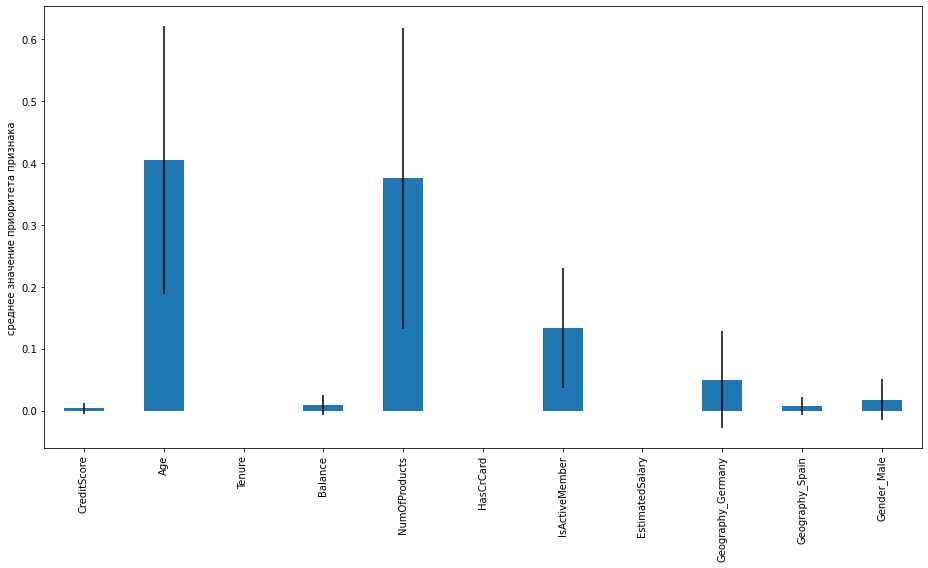

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots(figsize=(13,8))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("среднее значение приоритета признака")
fig.tight_layout()

# Новый раздел